# Student Performance Analysis using Data Analytics
This notebook performs data analysis on the UCI Student Performance dataset (Math and Portuguese subjects) to identify factors affecting student grades.

In [44]:

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Load datasets
df_mat = pd.read_csv("student-mat.csv", sep=';')
df_por = pd.read_csv("student-por.csv", sep=';')

# Add subject identifiers and combine datasets
df_mat['subject'] = 'Math'
df_por['subject'] = 'Portuguese'
df = pd.concat([df_mat, df_por], ignore_index=True)

print("Combined dataset shape:", df.shape)
df.head()

Combined dataset shape: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


## Data Preprocessing

In [45]:

# Create derived columns
df['pass'] = (df['G3'] >= 10).astype(int)
df['absences_bin'] = pd.cut(df['absences'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])
studytime_map = {1:'<2 hrs', 2:'2-5 hrs', 3:'5-10 hrs', 4:'>10 hrs'}
df['studytime_cat'] = df['studytime'].map(studytime_map)

# Check basic stats
df.head()
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,0.779693
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,0.414652
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


## Visualization 1: Distribution of Final Grades

In [46]:

plt.figure(figsize=(8,5))
plt.hist(df['G3'], bins=11, edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Count')
plt.savefig("fig1_hist_G3.png", dpi=300, bbox_inches='tight')
plt.close()



## Visualization 2: Average Grade by Gender

In [47]:

avg_by_sex = df.groupby('sex')['G3'].mean()
plt.bar(avg_by_sex.index, avg_by_sex.values, color=['purple','skyblue'])
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.savefig("fig2_bar_gender_G3.png", dpi=300, bbox_inches='tight')
plt.close()


## Visualization 3: Study Time vs Final Grade

In [48]:

x = df['studytime'] + (np.random.rand(len(df))*0.15 - 0.075)
plt.scatter(x, df['G3'], alpha=0.6)
plt.xticks([1,2,3,4], ['<2','2-5','5-10','>10'])
plt.xlabel('Weekly Study Time (category)')
plt.ylabel('Final Grade (G3)')
plt.title('Study Time vs Final Grade (G3)')
plt.savefig("fig3_scatter_studytime_G3.png", dpi=300, bbox_inches='tight')
plt.close()


## Visualization 4: Absences vs Final Grade

In [49]:

groups = df.groupby('absences_bin')['G3'].apply(list)
plt.boxplot(groups.dropna().tolist(), labels=groups.dropna().index.tolist())
plt.xlabel('Absences (binned)')
plt.ylabel('Final Grade (G3)')
plt.title('Final Grade (G3) by Absences (binned)')
plt.savefig("fig4_box_absences_G3.png", dpi=300, bbox_inches='tight')
plt.close()


C:\Users\sanke\AppData\Local\Temp\ipykernel_20160\2735404815.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\sanke\AppData\Local\Temp\ipykernel_20160\2735404815.py:2: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



## Correlation Heatmap

In [50]:

corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix (numeric features)')
plt.savefig("fig5_corr_matrix.png", dpi=300, bbox_inches='tight')
plt.close()

## Results Summary

In [52]:

import matplotlib.pyplot as plt
import seaborn as sns

# Group the data
medu_avg = df.groupby('Medu')['G3'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Medu', y='G3', data=medu_avg, palette='viridis')

plt.title("Average Final Grade (G3) by Mother's Education Level (Medu)")
plt.xlabel("Mother's Education Level (Medu)")
plt.ylabel("Average Final Grade (G3)")

# Save as required LaTeX filename
plt.savefig("fig7_medu_avgG3.png", dpi=300, bbox_inches='tight')
plt.close()


C:\Users\sanke\AppData\Local\Temp\ipykernel_20160\939754499.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [53]:
df["pass"] = (df["G3"] >= 10).astype(int)

# Calculate pass rate by subject
pass_rate_subject = df.groupby("subject")["pass"].mean().reset_index()

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x="subject", y="pass", data=pass_rate_subject, palette="Blues")

plt.title("Pass Rate by Subject (Math vs Portuguese)")
plt.xlabel("Subject")
plt.ylabel("Pass Rate")

# Save using required LaTeX filename
plt.savefig("fig6_passrate_subject.png", dpi=300, bbox_inches='tight')
plt.close()

C:\Users\sanke\AppData\Local\Temp\ipykernel_20160\4054970762.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




### Conclusion
- Study time has a positive effect on final grades.
- Higher absences lead to lower grades.
- Parental education shows positive influence.
- Early term grades (G1, G2) predict final grade (G3).

This concludes the analysis.

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression

d_mat = pd.read_csv("student-mat.csv", sep=";")
d_por = pd.read_csv("student-por.csv", sep=";")
df = pd.concat([d_mat, d_por])

X = df[['G1', 'G2', 'studytime', 'absences']]
y = df['G3']

model = LinearRegression()
model.fit(X, y)

# 3. Predict G4
# We use G2 as the new "G1", and G3 as the new "G2"
X_future = df[['G2', 'G3', 'studytime', 'absences']]
X_future.columns = ['G1', 'G2', 'studytime', 'absences'] 

df['G4'] = model.predict(X_future)

df['G4'] = df['G4'].clip(0, 20).round(0).astype(int)

print(df[['school', 'sex', 'G2', 'G3', 'G4']].head(10))

  school sex  G2  G3  G4
0     GP   F   6   6   6
1     GP   F   5   6   5
2     GP   F   8  10  10
3     GP   F  14  15  15
4     GP   F  10  10  10
5     GP   M  15  15  16
6     GP   M  12  11  11
7     GP   F   5   6   5
8     GP   M  18  19  20
9     GP   M  15  15  15


In [11]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G4
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,10


C:\Users\sanke\AppData\Local\Temp\ipykernel_20160\2055534745.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Term', y='Grade', data=plot_data, palette="viridis")


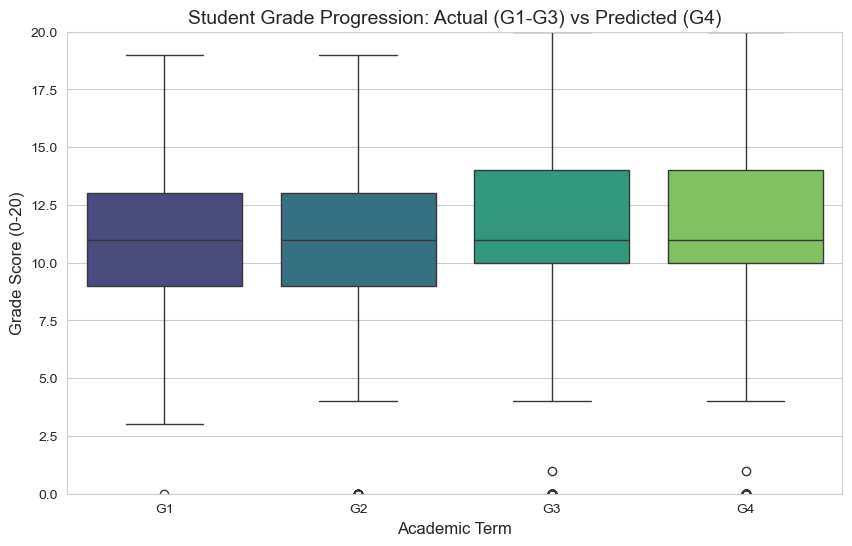

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Assuming 'df' already has the 'G4' integer column from the previous step) ...

# 1. Prepare data for plotting
# We 'melt' the dataframe to make it easy to plot side-by-side
plot_data = df[['G1', 'G2', 'G3', 'G4']].melt(var_name='Term', value_name='Grade')

# 2. Create the Figure
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 3. Create a Boxplot
# This shows the Median (line), the Range (box), and Outliers (dots)
sns.boxplot(x='Term', y='Grade', data=plot_data, palette="viridis")

# 4. Add labels and title
plt.title('Student Grade Progression: Actual (G1-G3) vs Predicted (G4)', fontsize=14)
plt.ylabel('Grade Score (0-20)', fontsize=12)
plt.xlabel('Academic Term', fontsize=12)
plt.ylim(0, 20)  # Grades are always 0-20

# 5. Save the graph
plt.savefig('fig8_prediction_G4.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# FIG 9 - Missing Values Heatmap
# -----------------------------
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.savefig("fig9_missing_heatmap.png", dpi=300)
plt.close()




In [14]:
# FIG 10 - Outlier Boxplot
# -----------------------------
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['absences','G1','G2','G3']])
plt.title("Outlier Detection")
plt.savefig("fig10_outlier_boxplot.png", dpi=300)
plt.close()

In [15]:
# FIG 11 - Pairplot Grades
# -----------------------------
sns.pairplot(df[['G1','G2','G3']])
plt.savefig("fig11_pairplot_grades.png", dpi=300)
plt.close()

In [16]:
# FIG 12 - Absences Histogram
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(df['absences'], bins=20)
plt.title("Absences Distribution")
plt.xlabel("Absences")
plt.ylabel("Count")
plt.savefig("fig12_absences_hist.png", dpi=300)
plt.close()

In [17]:
# FIG 13 - StudyTime Bar Chart
# -----------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='studytime', data=df)
plt.title("Study Time Distribution")
plt.savefig("fig13_studytime_bar.png", dpi=300)
plt.close()

In [18]:
# FIG 14 - Alcohol Consumption Boxplot
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='Dalc', y='G3', data=df)
plt.title("Alcohol Consumption vs G3")
plt.savefig("fig14_alcohol_G3_box.png", dpi=300)
plt.close()

In [19]:
# FIG 15 - Age vs Final Grade Scatter
# -----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='G3', data=df)
plt.title("Age vs Final Grade (G3)")
plt.savefig("fig15_age_G3_scatter.png", dpi=300)
plt.close()

In [20]:
# FIG 16 - Family Relationship vs Grade
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x='famrel', y='G3', data=df, errorbar=None)
plt.title("Family Relationship vs G3")
plt.savefig("fig16_famrel_G3_bar.png", dpi=300)
plt.close()

In [21]:
# FIG 17 - Categorical Correlation Heatmap
# -----------------------------
df_encoded = df.copy()
encoder = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = encoder.fit_transform(df_encoded[col])

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Categorical + Numeric Correlation Heatmap")
plt.savefig("fig17_categorical_corr.png", dpi=300)
plt.close()

In [25]:
!pip install -U kaleido
!pip install -U plotly


In [26]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


df_mat = pd.read_csv("student-mat.csv", sep=';')
df_por = pd.read_csv("student-por.csv", sep=';')

# Add subject identifiers and combine datasets
df_mat['subject'] = 'Math'
df_por['subject'] = 'Portuguese'
df = pd.concat([df_mat, df_por], ignore_index=True)
possible_sex = [c for c in df.columns if c.lower().startswith("sex") or "gender" in c.lower()]

print("Combined dataset shape:", df.shape)
df.head()

Combined dataset shape: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [27]:
sex_col = possible_sex[0]
if sex_col:
    radar_df = df.groupby(sex_col)[["studytime", "absences", "failures", "G3"]].mean()
else:
    radar_df = df.groupby("studytime")[["absences", "failures", "G3"]].mean()

fig_radar = go.Figure()

for group in radar_df.index:
    
    fig_radar.add_trace(go.Scatterpolar(
        r = radar_df.loc[group].values,
        theta = radar_df.columns,
        fill = 'toself',
        name = str(group)
    ))

fig_radar.update_layout(
    title = "Radar Chart of Performance Factors",
    polar = dict(radialaxis=dict(visible=True))
)

pio.write_image(fig_radar, "fig_radar.png")

In [28]:
fig_3d = px.scatter_3d(
    df,
    x="G1", y="G2", z="G3",
    color="studytime",
    color_continuous_scale="Plasma",
    title="3D Scatter Plot of G1, G2, G3"
)

pio.write_image(fig_3d, "fig_3dscatter.png")


In [29]:
# 1️⃣ VIOLIN PLOT – Gender vs Grades
# -----------------------------
plt.figure(figsize=(8,6))
sns.violinplot(x="sex", y="G3", data=df)
plt.title("Violin Plot: Gender vs Final Grade")
plt.savefig("fig18_violin_gender_grade.png", dpi=300)
plt.close()

In [30]:
# 2️⃣ KDE PLOT – Density of G1 vs G3
# -----------------------------
plt.figure(figsize=(8,6))
sns.kdeplot(x=df["G1"], y=df["G3"], fill=True, cmap="viridis")
plt.title("KDE Density Plot: G1 vs G3")
plt.savefig("fig19_kde_G1_G3.png", dpi=300)
plt.close()

In [31]:
# 3️⃣ JOINTPLOT – Studytime vs G3
# -----------------------------
sns.jointplot(x="studytime", y="G3", data=df, kind="reg", height=7)
plt.savefig("fig20_joint_studytime_G3.png", dpi=300)
plt.close()

In [33]:
# 4️⃣ ABSENCES BIN HEATMAP
# -----------------------------
df["abs_bin"] = pd.cut(df["absences"], bins=[0,5,10,20,50],
                       labels=["0–5","6–10","11–20","21+"])

pivot_table = df.pivot_table(values="G3", index="abs_bin", columns="failures", aggfunc="mean")
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
plt.title("Absence Bins vs Failures (Avg G3)")
plt.savefig("fig21_absence_failure_heatmap.png", dpi=300)
plt.close()

C:\Users\sanke\AppData\Local\Temp\ipykernel_20160\2685979382.py:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [34]:
# 5️⃣ SWARM PLOT – Age vs G3
# -----------------------------
plt.figure(figsize=(9,6))
sns.swarmplot(x="age", y="G3", data=df)
plt.title("Swarm Plot: Age vs Final Grade")
plt.savefig("fig22_swarm_age_G3.png", dpi=300)
plt.close()

C:\Users\sanke\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sanke\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sanke\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sanke\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\sanke\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



In [35]:
# 6️⃣ INTERNET ACCESS vs PASS RATE
# -----------------------------
df["pass"] = (df["G3"] >= 10).astype(int)
pass_rate = df.groupby("internet")["pass"].mean()

plt.figure(figsize=(7,6))
pass_rate.plot(kind="bar", color=["#2E86C1", "#1ABC9C"])
plt.title("Pass Rate Based on Internet Access")
plt.ylabel("Pass Rate")
plt.savefig("fig23_internet_passrate.png", dpi=300)
plt.close()

In [42]:
# 7️⃣ PIE CHART – Grade Categories
df["grade_cat"] = pd.cut(df["G3"], bins=[0,10,15,20],
                         labels=["Low","Medium","High"])
# -----------------------------
plt.figure(figsize=(6,6))
df["grade_cat"].value_counts().plot(kind="pie", autopct="%1.1f%%",
                                    colors=["#F1948A","#F9E79F","#7DCEA0"])
plt.title("Distribution of Grade Categories,bins=[0,10,15,20]")
plt.ylabel("")
plt.savefig("fig24_grade_category_pie.png", dpi=300)
plt.close()

In [38]:
# 8️⃣ BOxEN PLOT – Mother's Education vs G3
# -----------------------------
plt.figure(figsize=(8,6))
sns.boxenplot(x="Medu", y="G3", data=df)
plt.title("Boxen Plot: Mother's Education Level vs Final Grade")
plt.savefig("fig25_boxen_Medu_G3.png", dpi=300)
plt.close()